### HW4. Numerical Integration
### 2022313047 Boyeon,Kim

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import quad

In [2]:
# Set plot params
plt.rcParams['figure.figsize'] = [5,5]
plt.rcParams['font.size'] = 15
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 7
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['xtick.minor.size'] = 3.5
plt.rcParams['ytick.minor.size'] = 3.5
plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.minor.width'] = 1.5
plt.rcParams['ytick.minor.width'] = 1.5
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

### Consider the integral: $f(x)=\int_0^\pi \sin (x) d x$.

#### 1. Use Simpson’s rule and Gaussian quadrature (with 2, 3, or 4 nodes) to calculate the integral using 4, 8, 16, and 32 intervals. Plot the error versus the number of points in a log-log plot

In [3]:
# Define the integrand
def f(x):
    return np.sin(x)


In [4]:
# Define Simpson's rule
def simpson(f, x0, xN, num_pts):
    h = (xN - x0) / (float(num_pts - 1))
    x_pts = np.linspace(x0, xN, num_pts)
    data = f(x_pts)
    appx = (1/3) * h * (data[0] + data[-1] + 4*np.sum(data[1:-1:2]) + 2* np.sum(data[2:-2:2]))
    return appx

##### Simpson's Rule

In [5]:
# real value = 2
exact = 2.
num_inter = np.array([4, 8, 16, 32])

old_err = np.nan
x0 = 0
xN = np.pi

print('  Simpson\' Rule')
print('  n    appx       error           convergence rate')
err_window = []
for num_pts in num_inter:
    appx = simpson(f, x0, xN, num_pts+1)
    err = abs(exact - appx)
    ratio = old_err/err
    old_err = err
    err_window.append(err)
    print(f' {num_pts:2d}    {appx:6f}   {err:4e}    {ratio:.2f}')

  Simpson' Rule
  n    appx       error           convergence rate
  4    2.004560   4.559755e-03    nan
  8    2.000269   2.691699e-04    16.94
 16    2.000017   1.659105e-05    16.22
 32    2.000001   1.033369e-06    16.06


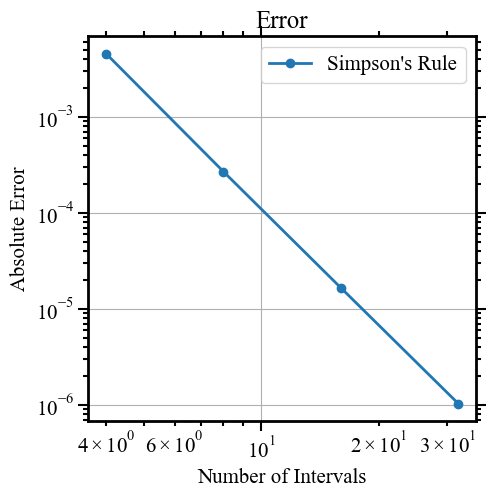

In [6]:
# Plot the errors versus the number of intervals in a log-log plot
plt.loglog(num_inter, err_window, 'o-', label='Simpson\'s Rule')
plt.xlabel('Number of Intervals')
plt.ylabel('Absolute Error')
plt.title('Error')
plt.legend()
plt.grid()
plt.show()

##### Gaussian quadrature rule

In [27]:
# Defin Gaussian quadrature
def Gq(f, a, b, num_node):
    t, w = np.polynomial.legendre.leggauss(num_node)
    x = (b-a)/2 * np.array(t) + (b+a)/2
    y = f(x)
    appx = (b-a)/2 * np.sum(w * y)
    return x, appx

In [29]:
num_nodes = [2, 3, 4]
err_window = []
for num in num_nodes:
    print(f'\n Gaussian Quadrature Rule :{num} node')
    print('  n    appx       error           convergence rate')
    old_err = np.nan
    for num_pts in num_inter:
        x, appx = Gq(f, x0, xN, num)
        err = abs(exact - appx)
        ratio = old_err/err
        old_err = err
        err_window.append(err)
        print(f' {num_pts:2d}    {appx:6f}   {err:4e}    {ratio:.2f}')
    print(f'Node xi = {x}')



 Gaussian Quadrature Rule :2 node
  n    appx       error           convergence rate
  4    1.935820   6.418043e-02    nan
  8    1.935820   6.418043e-02    1.00
 16    1.935820   6.418043e-02    1.00
 32    1.935820   6.418043e-02    1.00
Node xi = [0.66389664 2.47769601]

 Gaussian Quadrature Rule :3 node
  n    appx       error           convergence rate
  4    2.001389   1.388914e-03    nan
  8    2.001389   1.388914e-03    1.00
 16    2.001389   1.388914e-03    1.00
 32    2.001389   1.388914e-03    1.00
Node xi = [0.35406272 1.57079633 2.78752993]

 Gaussian Quadrature Rule :4 node
  n    appx       error           convergence rate
  4    1.999984   1.577154e-05    nan
  8    1.999984   1.577154e-05    1.00
 16    1.999984   1.577154e-05    1.00
 32    1.999984   1.577154e-05    1.00
Node xi = [0.21812657 1.03675535 2.1048373  2.92346608]


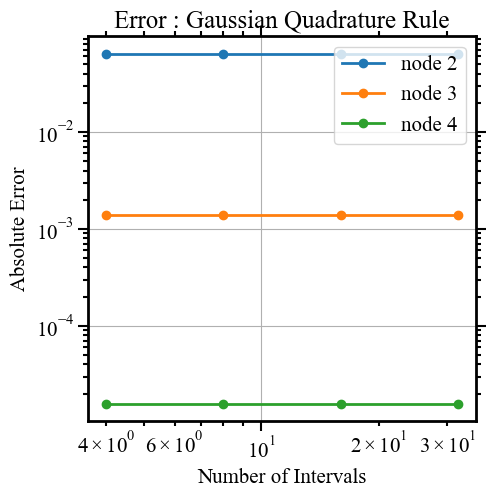

In [30]:
err_window = np.reshape(err_window, (len(num_nodes), len(num_inter)))

# Plot the errors versus the number of intervals in a log-log plot
plt.loglog(num_inter, err_window[0], 'o-', label='node 2')
plt.loglog(num_inter, err_window[1], 'o-', label='node 3')
plt.loglog(num_inter, err_window[2], 'o-', label='node 4')
plt.xlabel('Number of Intervals')
plt.ylabel('Absolute Error')
plt.title('Error : Gaussian Quadrature Rule')
plt.legend()
plt.grid()
plt.show()

### 2. Develop a quadrature method based on cubic spline interpolation.

In [10]:
def TDMA(a,b,c,d):
    n = len(c)
    dp = np.zeros(n)
    cp = np.zeros(n)
    x = np.zeros(n)

    # forward sweep
    dp[0] = d[0]
    cp[0] = c[0]

    for i in range(1, n):
        dp[i] = d[i] - b[i]*a[i-1]/dp[i-1]
        cp[i] = c[i] - b[i]*cp[i-1]/dp[i-1]

    # Backward substitution
    x[n-1] = cp[n-1]/dp[n-1]

    for i in range(n-2, -1, -1):
        x[i] = (cp[i] - a[i] * x[i+1])/dp[i]
    
    return x

In [11]:
def cubic_spline(x, y, xval):
    N = len(x) - 1
    Np = N + 1
    Nm = N - 1

    # initialize arrays
    h = np.zeros(N)
    ddp = np.zeros(Np)
    upp = np.zeros(Nm)
    low = np.zeros(Nm)
    dia = np.zeros(Nm)
    rhs = np.zeros(Nm)

    ddp[0], ddp[N] = 0.0, 0.0

    h[:] = x[1:] - x[:-1]

    upp[:-1] = h[1:-1]/6
    dia[:] = (h[:-1] + h[1:])/3
    low[1:] = h[1:-1]/6

    rhs[:] = (y[2:] - y[1:-1])/h[1:] - (y[1:-1] - y[:-2])/h[:-1]
    rhs[0] -= h[0]*ddp[0]/6
    rhs[-1] -= h[-1]*ddp[-1]/6

    ddp[1:-1] = TDMA(upp, low, rhs, dia)

    Ncs = len(xval)
    yval = np.zeros(Ncs)

    for i in range(N):
        for j in range(Ncs):
            if x[i+1] >= xval[j] and x[i] < xval[j]:
                yval[j] = ddp[i]/6 * ((x[i+1] - xval[j])**3/h[i] - h[i]*(x[i+1]-xval[j]))\
                        + ddp[i+1]/6 * ((xval[j] - x[i])**3/h[i] - h[i]*(xval[j] - x[i]))\
                        + y[i]*(x[i+1] - xval[j])/h[i] + y[i+1]*(xval[j] - x[i])/h[i]
    
    return yval

In [12]:
xa = np.linspace(1,5,100)
x = np.array([1, 1.5, 2, 2.5, 3, 4, 5])
y = np.array([0, 1.5, 2, 2, 1, 1, 3])
ya = cubic_spline(x,y,xa)

In [13]:
import numpy as np
from scipy.interpolate import CubicSpline

def cubic_spline_quadrature(f, a, b, n, rule='midpoint'):
    # Generate n+1 equally spaced nodes
    x = np.linspace(a, b, n+1)
    # Evaluate the function at the nodes
    y = f(x)
    # Compute the coefficients of the cubic spline
    cs = CubicSpline(x, y, bc_type='natural')
    # Compute the integral using the chosen quadrature rule
    if rule == 'midpoint':
        # Midpoint rule
        h = (b-a)/n
        x_mid = np.linspace(a+h/2, b-h/2, n)
        integral = np.sum(cs(x_mid))*h
    elif rule == 'trapezoidal':
        # Trapezoidal rule
        h = (b-a)/n
        x_trap = np.linspace(a+h, b-h, n-1)
        integral = (cs(a) + cs(b) + 2*np.sum(cs(x_trap)))*h/2
    elif rule == 'simpson':
        # Simpson's rule
        integral = simpson(cs,a,b,n)
    else:
        raise ValueError('Invalid quadrature rule')
    return integral

# Define the integrand function
def f(x):
    return np.sin(x)

# Exact value of the integral
exact = 2

# List of numbers of intervals to use
n_values = [4, 8, 16, 32, 64, 128]

# Compute the approximated values and errors using the midpoint rule
methods = ['midpoint', 'trapezoidal', 'simpson']
err_window = []
value_window = []
for method in methods:
    print(f'\n {method} Rule')
    print('    n    appx         error           convergence rate')
    old_err = np.nan
    for n in n_values:
        approx = cubic_spline_quadrature(f, 0, np.pi, n, method)
        value_window.append(approx)
        err = abs(approx-exact)
        ratio = old_err/err
        old_err = err
        err_window.append(err)
        print(f' {n:4d}    {appx:6f}     {err:4e}        {ratio:.2f}')



 midpoint Rule
    n    appx         error           convergence rate
    4    0.005131     4.998068e-02        nan
    8    0.005131     1.277956e-02        3.91
   16    0.005131     3.208549e-03        3.98
   32    0.005131     8.029311e-04        4.00
   64    0.005131     2.007815e-04        4.00
  128    0.005131     5.019840e-05        4.00

 trapezoidal Rule
    n    appx         error           convergence rate
    4    0.005131     1.038811e-01        nan
    8    0.005131     2.576840e-02        4.03
   16    0.005131     6.429656e-03        4.01
   32    0.005131     1.606639e-03        4.00
   64    0.005131     4.016114e-04        4.00
  128    0.005131     1.003998e-04        4.00

 simpson Rule
    n    appx         error           convergence rate
    4    0.005131     7.920499e-01        nan
    8    0.005131     1.635973e-01        4.84
   16    0.005131     3.635188e-02        4.50
   32    0.005131     8.547379e-03        4.25
   64    0.005131     2.071579e-03  

In [14]:
err_window = np.reshape(err_window, (len(methods), len(n_values)))


### 3. Use the cubic spline-quadrature method developed in part 2 to calculate the integral. Discuss the error for numerical integrations by varying the number of intervals.

Text(0.5, 1.0, 'Error : cubic spline quadrature')

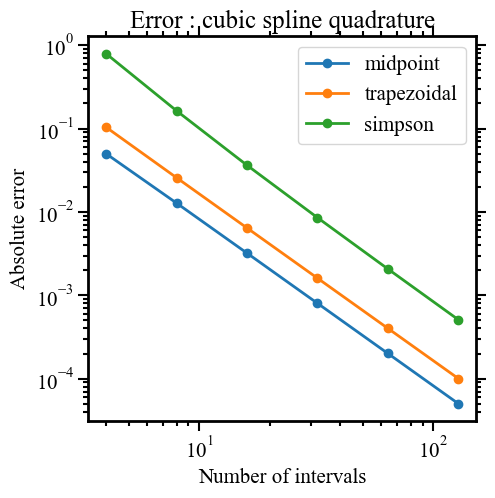

In [15]:

# Plot the errors versus the number of intervals
import matplotlib.pyplot as plt
plt.loglog(n_values, err_window[0], 'o-', label = 'midpoint')
plt.loglog(n_values, err_window[1], 'o-', label = 'trapezoidal')
plt.loglog(n_values, err_window[2], 'o-', label = 'simpson')
plt.xlabel('Number of intervals')
plt.ylabel('Absolute error')
plt.legend()
plt.title('Error : cubic spline quadrature')


### 4. Use the Monte-Carlo method to calculate the integral.

In [16]:
def MonteCalro(f, x0, xN, num_pts):
    x = x0 + (xN - x0) * np.random.random(num_pts)
    data = f(x)
    mean = data.mean()
    var = data.var()
    appx = (xN-x0)*mean
    return[appx, mean, var]

In [17]:
print('\n MonteCalro method')
print('      n    appx      error      var        sig(I)')
for i in range(6):
    num_pts = 10**i
    appx, mean, var = MonteCalro(f, x0, xN, num_pts)
    err = abs(exact - appx)
    sigI = (xN - x0)*np.sqrt(var/num_pts)
    print(f' {num_pts:6d}    {appx:.5f}   {err:.5f}    {var:.5f}    {sigI:.5f}')


 MonteCalro method
      n    appx      error      var        sig(I)
      1    2.92151   0.92151    0.00000    0.00000
     10    1.46685   0.53315    0.12856    0.35621
    100    1.91313   0.08687    0.08263    0.09031
   1000    2.00705   0.00705    0.09626    0.03082
  10000    2.01343   0.01343    0.09449    0.00966
 100000    1.99787   0.00213    0.09443    0.00305
